In [ ]:
!pip install -U -t /kaggle/working/ git+https://github.com/Kaggle/learntools.git@nb-refactor

In [ ]:
import sys
sys.path.append('/kaggle/working')

# Exercise (t-SNE)

One practical application of visualizing trained embeddings with t-SNE is understanding what information about the embedded entities our model has (and hasn't) learned. This can give us some intuition about how our model works, what latent features it thinks are useful, whether adding certain additional data explicitly might improve the model's accuracy, and so on.

In the [tutorial](https://www.kaggle.com/colinmorris/4-visualizing-embeddings-with-t-sne), we briefly explored the question of whether our embeddings were sensitive to genre. In this exercise, we'll see if we can identify patterns in our 2-d embedding space when we group or filter by some other movie metadata.

To get started, run the code cell below to import the necessary libraries, and load a copy of the t-SNE mapping we learned in the lesson.

In [ ]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

from learntools.core import binder; binder.bind(globals())
from learntools.embeddings.ex4_tsne import *

RUNNING_ON_KERNELS = 'KAGGLE_WORKING_DIR' in os.environ
input_dir = '../input/4-visualizing-embeddings-with-t-sne' if RUNNING_ON_KERNELS else '.'
csv_path = os.path.join(input_dir, 'movies_tsne.csv')
df = pd.read_csv(csv_path, index_col=0)

# 1. Release year

The code cell below shows how we can use the `c` keyword arg of [`Axes.scatter`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html) to specify a color for each point of a scatter plot. Right now, we're graphing the positions of our movie embeddings (after t-SNE dimensionality reduction) and assigning color randomly.

Update the code below so that a movie's point is colored according to its year of release.

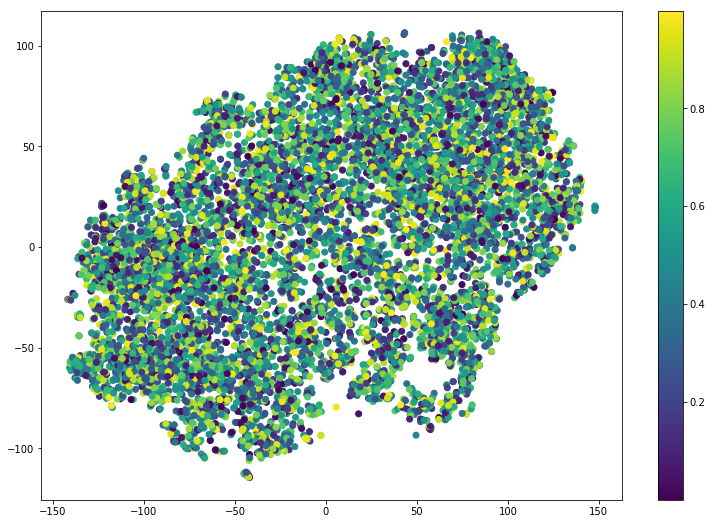

In [ ]:
FS = (13, 9)
fig, ax = plt.subplots(figsize=FS)

c = np.random.rand(len(df))

pts = ax.scatter(df.x, df.y, c=c)

cbar = fig.colorbar(pts)

Are our movie embeddings sensitive to year? 

Is there a global pattern to year of release in our t-SNE mapping? i.e. is it possible to draw a straight line through our embeddings such that year tends to increase as we move in that direction? 

## Bonus

If you'd like to push yourself further, try some of the following exercises:

- Try experimenting with different color maps, using the `cmap` keyword argument to `scatter`. You can browse the colormaps that ship with matplotlib [here](https://matplotlib.org/examples/color/colormaps_reference.html). Do different colormaps offer different insights into the data? What if you use one of the "qualitative colormaps"?
- By default, the smallest and largest numerical values in the data are mapped to the extremes of our colormap. In the case of year, the earliest movie in our dataset is from 1902, but there are very few movies in the first few decades of the 20th century. Would our results be easier to interpret if we started our colormap at 1930 or 1940? Give it a try. Hint: check out the `norm` argument to [`ax.scatter`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html) and the documentation for [`matplotlib.colors.Normalize`](https://matplotlib.org/api/_as_gen/matplotlib.colors.Normalize.html#matplotlib.colors.Normalize).
- Can you identify any exceptions to the overall trend in your graph? Try zooming in on the area of an anomaly and looking at the labels of the points. How many movies make up the anomaly? Do you have a hypothesis about why our algorithm would have placed them there? (Suggestion: try reusing some of the helper functions defined in [the tutorial](https://www.kaggle.com/colinmorris/4-visualizing-embeddings-with-t-sne) such as `plot_region`)

In [ ]:
#part1.solution()

# 2. Average rating

This is a very salient question for our problem of predicting user-assigned ratings. Does a movie's "goodness" or "badness", as measured by its average user rating, manifest in its embedding? 

To find out, create a scatter plot of our movie embeddings where a movie's color is set according to its mean rating.

**Hint**: Use the code from part 1 as a model.

In [ ]:
# Your code goes here

Again, is there a global pattern to the distribution of mean rating?

In [ ]:
#part2.hint()

In [ ]:
#part2.solution()

**Bonus**: Some movies are divisive - you either love them, or you hate them. Is this reflected in our embeddings? You'll have to come up with a way to calculate a measure of how 'spread out' the user ratings are for each movie.

# 3. Number of ratings

Do our embeddings reflect the number of ratings we have in the dataset for each movie? (We might think of this as a proxy for how popular or obscure a movie is.)

Run the code cell below to generate a visualization similar to the previous two, this time using color to represent number of ratings:

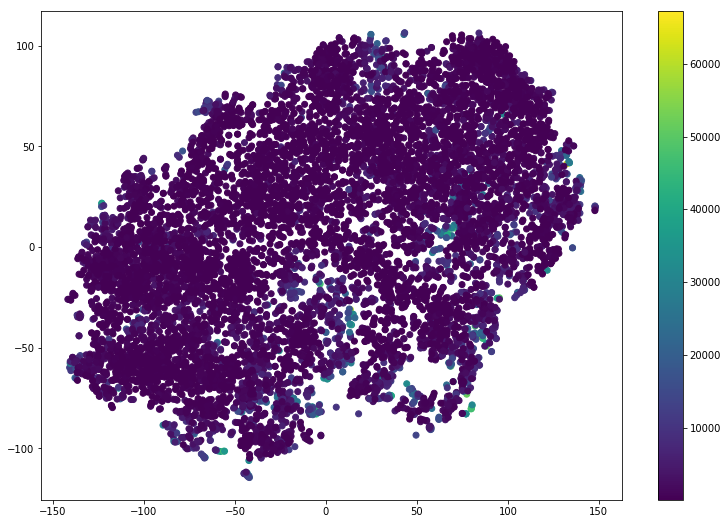

In [ ]:
fig, ax = plt.subplots(figsize=FS)

c = df.n_ratings

pts = ax.scatter(df.x, df.y, c=c)

cbar = fig.colorbar(pts)

Yikes, this is pretty hard to read. Most of our movies have on the order of hundreds of ratings, but there's also a long tail of movies with tends of thousands of ratings, which makes a linear scale a poor choice. 

Try improving the visualization above to help us answer our original question: are our embeddings sensitive to number of ratings? (And to what degree is the trend global vs. local?)

**Hint**: Check out the `norm` keyword argument to [`Axes.scatter`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html).

In [ ]:
#part3.solution()

# 4. (Bonus) Going further afield

If you're feeling ambitious, try searching for another Kaggle movie dataset and visualizing one or more variables you find there. You'll need to do a join with our MovieLens data on title.

For example, [imdb-data](https://www.kaggle.com/PromptCloudHQ/imdb-data) has some interesting features we're missing including box office revenue, runtime, and director.

---

And that's it for t-SNE. Though, if you're so inclined, I encourage you to do your own exploration of the embedding space using the helper functions defined at the top of the notebook (or defining your own). It's a lot of fun! Well, at least if you're a movie buff. And if you discover an interesting pattern, or build a visualization you're especially proud of, do share it on [the forums](TODO)!